<a href="https://colab.research.google.com/github/csharpshooter/EVA/blob/master/A12/A12-A/A12_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Sun Apr 19 10:28:48 2020


In [2]:
!git clone https://github.com/csharpshooter/EVA.git 

fatal: destination path 'EVA' already exists and is not an empty directory.


In [3]:
cd /content/EVA/A12/A12-A/

/content/EVA/A12/A12-A


In [4]:
!pip install -U git+https://github.com/albu/albumentations
!pip install -U tqdm

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-vcwkiizz
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-vcwkiizz
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65099 sha256=ed0025a6397d20b9bfd6342ea54faa207567c27042a60fb10cc34cca936c15d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-bwudtwqk/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5
Requirement already up-to-date: tqdm in /usr/local/lib/python3.6/dist-packages (4.45.0)


In [0]:
from src.imports import *

%config IPCompleter.greedy=True
%reload_ext autoreload

In [0]:
%autoreload 2  # Autoreload all modules

In [24]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)
    
printgpuinfo()

Sun Apr 19 14:12:55 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    31W / 250W |  15229MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [23]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    ram_gb_avail = virtual_memory().available / 1e9
    ram_gb_used = virtual_memory().active / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
    print('Your runtime has {:.1f} gigabytes of free RAM\n'.format(ram_gb_avail))
    print('Your runtime has {:.1f} gigabytes of used RAM\n'.format(ram_gb_used))    
showsysteminfo()

Your runtime has 13.7 gigabytes of available RAM

Your runtime has 10.5 gigabytes of free RAM

Your runtime has 3.4 gigabytes of used RAM



In [0]:
import torch
print(torch.__version__)

1.4.0


100%|██████████| 200/200 [00:00<00:00, 2542.61it/s]
10000it [00:00, 565765.70it/s]

File: tiny-imagenet-200.zip already downloaded.
File: tiny-imagenet-200 already extracted.
Starting data loading
Finished data loading, in 0.10191535949707031 seconds
CUDA Available? True
64



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping 

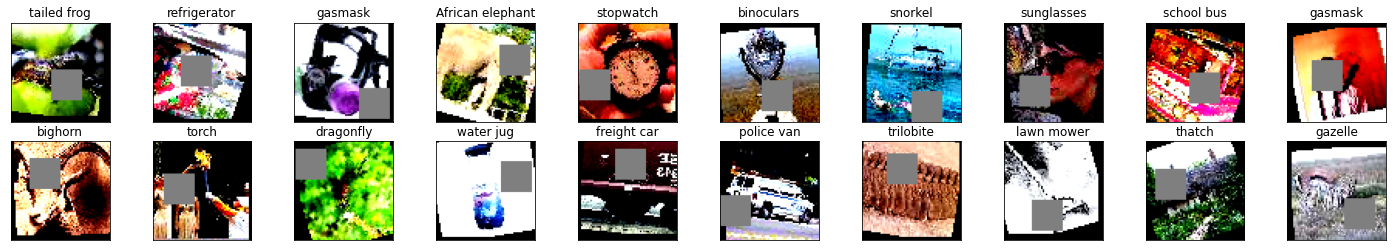

In [25]:
batch_size = 64
helper = TinyImagenetHelper()

path = helper.download_dataset(folder_path="data")
classes, id_dict = helper.get_classes(path)

test_loader, train_loader = helper.get_tiny_image_net_test_train_loader(id_dict, path, batch_size)

data_iterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(data_iterator, values=classes, image_count=20, col=5)

In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

cnn_model = torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 6

In [0]:
epochs = 21

In [0]:
lambda_fn = lambda epoch: (epoch * 1)
lr_data, class_correct, class_total = train_model.start_training_lr_finder(epochs=epochs, model=cnn_model, device=device, test_loader=test_loader, 
                                                                           train_loader=train_loader, lr=0.1, weight_decay=0, lambda_fn=lambda_fn)

  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 0
Learning rate = 0.0  for epoch:  0


Loss=5.644444942474365 Batch_id=1203 Accuracy=0.47: 100%|██████████| 1204/1204 [00:49<00:00, 24.36it/s] 



Test set: Average loss: 0.0851, Accuracy: 178/33000 (0.54%)

Validation accuracy increased (0.000000 --> 0.539394).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 1
Learning rate = 0.1  for epoch:  1


Loss=5.562046527862549 Batch_id=1203 Accuracy=3.38: 100%|██████████| 1204/1204 [01:16<00:00, 15.80it/s] 



Test set: Average loss: 0.0760, Accuracy: 1625/33000 (4.92%)

Validation accuracy increased (0.539394 --> 4.924242).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 2
Learning rate = 0.2  for epoch:  2


Loss=4.08854866027832 Batch_id=1203 Accuracy=10.08: 100%|██████████| 1204/1204 [01:31<00:00, 13.17it/s]  



Test set: Average loss: 0.0618, Accuracy: 4869/33000 (14.75%)

Validation accuracy increased (4.924242 --> 14.754545).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 3
Learning rate = 0.30000000000000004  for epoch:  3


Loss=3.0451598167419434 Batch_id=1203 Accuracy=14.71: 100%|██████████| 1204/1204 [01:42<00:00, 11.73it/s]



Test set: Average loss: 0.0635, Accuracy: 5159/33000 (15.63%)

Validation accuracy increased (14.754545 --> 15.633333).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 4
Learning rate = 0.4  for epoch:  4


Loss=4.707352638244629 Batch_id=1203 Accuracy=17.24: 100%|██████████| 1204/1204 [01:44<00:00, 11.49it/s] 
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0637, Accuracy: 5146/33000 (15.59%)

EPOCH: 5
Learning rate = 0.5  for epoch:  5


Loss=3.6544556617736816 Batch_id=1203 Accuracy=18.91: 100%|██████████| 1204/1204 [01:49<00:00, 10.95it/s]



Test set: Average loss: 0.0562, Accuracy: 6868/33000 (20.81%)

Validation accuracy increased (15.633333 --> 20.812121).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 6
Learning rate = 0.6000000000000001  for epoch:  6


Loss=3.5862748622894287 Batch_id=1203 Accuracy=19.75: 100%|██████████| 1204/1204 [01:51<00:00, 10.80it/s]



Test set: Average loss: 0.0567, Accuracy: 6928/33000 (20.99%)

Validation accuracy increased (20.812121 --> 20.993939).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 7
Learning rate = 0.7000000000000001  for epoch:  7


Loss=3.719308853149414 Batch_id=1203 Accuracy=20.35: 100%|██████████| 1204/1204 [01:53<00:00, 10.64it/s] 
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0574, Accuracy: 6765/33000 (20.50%)

EPOCH: 8
Learning rate = 0.8  for epoch:  8


Loss=2.9724280834198 Batch_id=1203 Accuracy=20.72: 100%|██████████| 1204/1204 [01:57<00:00, 10.24it/s]   
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0570, Accuracy: 6863/33000 (20.80%)

EPOCH: 9
Learning rate = 0.9  for epoch:  9


Loss=4.031769752502441 Batch_id=1203 Accuracy=20.77: 100%|██████████| 1204/1204 [02:00<00:00, 10.01it/s] 



Test set: Average loss: 0.0553, Accuracy: 7412/33000 (22.46%)

Validation accuracy increased (20.993939 --> 22.460606).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 10
Learning rate = 1.0  for epoch:  10


Loss=3.1196932792663574 Batch_id=1203 Accuracy=21.11: 100%|██████████| 1204/1204 [01:51<00:00, 10.80it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0604, Accuracy: 6271/33000 (19.00%)

EPOCH: 11
Learning rate = 1.1  for epoch:  11


Loss=2.697969913482666 Batch_id=1203 Accuracy=21.55: 100%|██████████| 1204/1204 [01:39<00:00, 12.12it/s] 
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0566, Accuracy: 7213/33000 (21.86%)

EPOCH: 12
Learning rate = 1.2000000000000002  for epoch:  12


Loss=2.474069833755493 Batch_id=1203 Accuracy=21.93: 100%|██████████| 1204/1204 [01:43<00:00, 11.60it/s] 



Test set: Average loss: 0.0540, Accuracy: 8086/33000 (24.50%)

Validation accuracy increased (22.460606 --> 24.503030).  Saving model ...


  0%|          | 0/1204 [00:00<?, ?it/s]

EPOCH: 13
Learning rate = 1.3  for epoch:  13


Loss=5.598165035247803 Batch_id=1203 Accuracy=22.58: 100%|██████████| 1204/1204 [01:37<00:00, 12.38it/s] 
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0583, Accuracy: 6937/33000 (21.02%)

EPOCH: 14
Learning rate = 1.4000000000000001  for epoch:  14


Loss=4.126617431640625 Batch_id=1203 Accuracy=22.79: 100%|██████████| 1204/1204 [01:39<00:00, 12.15it/s] 
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0540, Accuracy: 7957/33000 (24.11%)

EPOCH: 15
Learning rate = 1.5  for epoch:  15


Loss=2.644207000732422 Batch_id=1203 Accuracy=23.24: 100%|██████████| 1204/1204 [01:39<00:00, 12.10it/s] 
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0564, Accuracy: 7659/33000 (23.21%)

EPOCH: 16
Learning rate = 1.6  for epoch:  16


Loss=4.798423767089844 Batch_id=1203 Accuracy=23.75: 100%|██████████| 1204/1204 [01:37<00:00, 12.35it/s] 
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0558, Accuracy: 7741/33000 (23.46%)

EPOCH: 17
Learning rate = 1.7000000000000002  for epoch:  17


Loss=3.3893041610717773 Batch_id=1203 Accuracy=23.72: 100%|██████████| 1204/1204 [01:37<00:00, 12.39it/s]
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0560, Accuracy: 7644/33000 (23.16%)

EPOCH: 18
Learning rate = 1.8  for epoch:  18


Loss=6.449216842651367 Batch_id=1203 Accuracy=23.14: 100%|██████████| 1204/1204 [01:37<00:00, 12.33it/s] 
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0607, Accuracy: 6870/33000 (20.82%)

EPOCH: 19
Learning rate = 1.9000000000000001  for epoch:  19


Loss=4.496230125427246 Batch_id=1203 Accuracy=22.97: 100%|██████████| 1204/1204 [01:54<00:00, 10.47it/s] 
  0%|          | 0/1204 [00:00<?, ?it/s]


Test set: Average loss: 0.0662, Accuracy: 6665/33000 (20.20%)

EPOCH: 20
Learning rate = 2.0  for epoch:  20


Loss=5.534939765930176 Batch_id=1203 Accuracy=23.57: 100%|██████████| 1204/1204 [02:03<00:00,  9.77it/s] 



Test set: Average loss: 0.0705, Accuracy: 5448/33000 (16.51%)

Saving final model after training cycle completion


In [0]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()

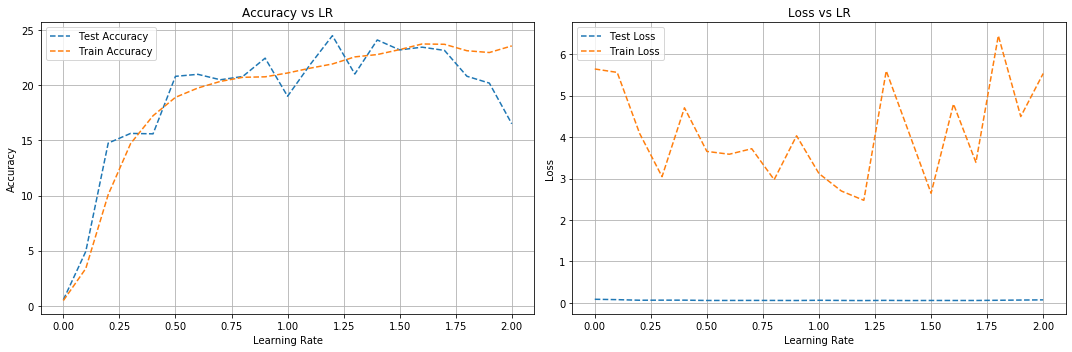

In [0]:
plotdata.PlotData.plotlrrangetestgraph(lr_data,test_acc,train_acc,test_losses,train_losses)

In [0]:
from src.imports import *

%config IPCompleter.greedy=True
%reload_ext autoreload

In [12]:
lr_max = round(0.04935,5)
# lr_max = round(0.04935,5)
# lr_max = round(0.09200,5)
# lr_max = round(0.82,5)
# lr_max = round(0.5,2)
print("lrmax = {}".format(lr_max))
lr_min = round(lr_max / 13,5)
# lr_min = 0.06133
print("lrmin = {}".format(lr_min))
epochs = 50
max_lr_epoch = 5

lrmax = 0.04935
lrmin = 0.0038


100%|██████████| 200/200 [00:00<00:00, 2535.14it/s]
10000it [00:00, 784084.65it/s]

File: tiny-imagenet-200.zip already downloaded.
File: tiny-imagenet-200 already extracted.
Starting data loading
Finished data loading, in 0.10240745544433594 seconds
CUDA Available? True
512



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping 

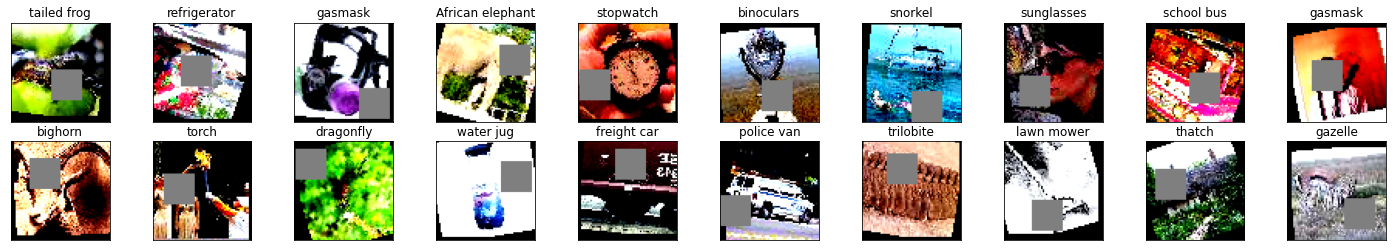

In [13]:
batch_size = 512
helper = TinyImagenetHelper()

path = helper.download_dataset(folder_path="data")
classes, id_dict = helper.get_classes(path)

test_loader, train_loader = helper.get_tiny_image_net_test_train_loader(id_dict, path, batch_size)

data_iterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(data_iterator, values=classes, image_count=20, col=5)

In [14]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

# cnn_model = torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)
cnn_model, device = utils.Utils.createmodelresnet18(model_state_dict=None, numclasses=200)
train_model = train.TrainModel()

cuda


In [15]:
# lr_data, class_correct, class_total = train_model.start_training_cyclic_lr(epochs,cnn_model,device,test_loader,train_loader, 
#                                                                            max_lr_epoch,0.003,lr_min,lr_max,cycles=1,annealing=False)

lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
optimizer = train_model.get_optimizer(model=cnn_model, weight_decay=0.003)

scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer=optimizer, base_lr=lr_min, max_lr=lr_max,
                                                      mode='triangular2',
                                                      cycle_momentum=True, step_size_up=max_lr_epoch,
                                                      step_size_down=20, )

train_model.start_training(epochs, cnn_model, device, test_loader, train_loader, optimizer, scheduler, lr_data,
                            class_correct, class_total, path="savedmodels/finalmodelwithdata.pt")

  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 0
Learning rate = 0.0038  for epoch:  0


Loss=4.822839260101318 Batch_id=150 Accuracy=4.25: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0092, Accuracy: 2015/33000 (6.11%)

Validation accuracy increased (0.000000 --> 6.106061).  Saving model ...
EPOCH: 1
Learning rate = 0.012910000000000008  for epoch:  1


Loss=3.924772024154663 Batch_id=150 Accuracy=9.76: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 2534/33000 (7.68%)

Validation accuracy increased (6.106061 --> 7.678788).  Saving model ...
EPOCH: 2
Learning rate = 0.02202000000000002  for epoch:  2


Loss=3.6599209308624268 Batch_id=150 Accuracy=15.18: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 5167/33000 (15.66%)

Validation accuracy increased (7.678788 --> 15.657576).  Saving model ...
EPOCH: 3
Learning rate = 0.031130000000000026  for epoch:  3


Loss=3.2844152450561523 Batch_id=150 Accuracy=19.67: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 6120/33000 (18.55%)

Validation accuracy increased (15.657576 --> 18.545455).  Saving model ...
EPOCH: 4
Learning rate = 0.04023999999999998  for epoch:  4


Loss=3.5558042526245117 Batch_id=150 Accuracy=23.29: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 4817/33000 (14.60%)

EPOCH: 5
Learning rate = 0.04934999999999999  for epoch:  5


Loss=3.0426547527313232 Batch_id=150 Accuracy=26.39: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 3386/33000 (10.26%)

EPOCH: 6
Learning rate = 0.047072499999999996  for epoch:  6


Loss=3.021240472793579 Batch_id=150 Accuracy=29.81: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 5300/33000 (16.06%)

EPOCH: 7
Learning rate = 0.044794999999999995  for epoch:  7


Loss=2.918788433074951 Batch_id=150 Accuracy=32.50: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8408/33000 (25.48%)

Validation accuracy increased (18.545455 --> 25.478788).  Saving model ...
EPOCH: 8
Learning rate = 0.04251749999999999  for epoch:  8


Loss=2.9398016929626465 Batch_id=150 Accuracy=34.88: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 7589/33000 (23.00%)

EPOCH: 9
Learning rate = 0.040240000000000005  for epoch:  9


Loss=2.6281609535217285 Batch_id=150 Accuracy=36.62: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 5737/33000 (17.38%)

EPOCH: 10
Learning rate = 0.0379625  for epoch:  10


Loss=2.5468602180480957 Batch_id=150 Accuracy=38.55: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 10707/33000 (32.45%)

Validation accuracy increased (25.478788 --> 32.445455).  Saving model ...
EPOCH: 11
Learning rate = 0.035685  for epoch:  11


Loss=2.4116506576538086 Batch_id=150 Accuracy=40.12: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8900/33000 (26.97%)

EPOCH: 12
Learning rate = 0.0334075  for epoch:  12


Loss=2.459543228149414 Batch_id=150 Accuracy=41.65: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 10275/33000 (31.14%)

EPOCH: 13
Learning rate = 0.03113  for epoch:  13


Loss=2.344982624053955 Batch_id=150 Accuracy=43.10: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 10492/33000 (31.79%)

EPOCH: 14
Learning rate = 0.0288525  for epoch:  14


Loss=2.4819231033325195 Batch_id=150 Accuracy=44.56: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 9656/33000 (29.26%)

EPOCH: 15
Learning rate = 0.026574999999999998  for epoch:  15


Loss=2.27528977394104 Batch_id=150 Accuracy=46.05: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 8858/33000 (26.84%)

EPOCH: 16
Learning rate = 0.024297499999999993  for epoch:  16


Loss=2.1358072757720947 Batch_id=150 Accuracy=47.39: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 12389/33000 (37.54%)

Validation accuracy increased (32.445455 --> 37.542424).  Saving model ...
EPOCH: 17
Learning rate = 0.02201999999999999  for epoch:  17


Loss=1.8324198722839355 Batch_id=150 Accuracy=49.02: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 13521/33000 (40.97%)

Validation accuracy increased (37.542424 --> 40.972727).  Saving model ...
EPOCH: 18
Learning rate = 0.019742500000000003  for epoch:  18


Loss=2.04144024848938 Batch_id=150 Accuracy=50.38: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 12844/33000 (38.92%)

EPOCH: 19
Learning rate = 0.017465  for epoch:  19


Loss=1.987189531326294 Batch_id=150 Accuracy=52.01: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 12558/33000 (38.05%)

EPOCH: 20
Learning rate = 0.015187499999999998  for epoch:  20


Loss=1.729616403579712 Batch_id=150 Accuracy=53.78: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 12474/33000 (37.80%)

EPOCH: 21
Learning rate = 0.012910000000000008  for epoch:  21


Loss=1.7213836908340454 Batch_id=150 Accuracy=55.35: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]



Test set: Average loss: 0.0046, Accuracy: 14333/33000 (43.43%)

Validation accuracy increased (40.972727 --> 43.433333).  Saving model ...


  0%|          | 0/151 [00:00<?, ?it/s]

EPOCH: 22
Learning rate = 0.010632500000000007  for epoch:  22


Loss=1.9374393224716187 Batch_id=150 Accuracy=57.32: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 15408/33000 (46.69%)

Validation accuracy increased (43.433333 --> 46.690909).  Saving model ...
EPOCH: 23
Learning rate = 0.008355000000000005  for epoch:  23


Loss=1.7135740518569946 Batch_id=150 Accuracy=59.68: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 15621/33000 (47.34%)

Validation accuracy increased (46.690909 --> 47.336364).  Saving model ...
EPOCH: 24
Learning rate = 0.006077500000000002  for epoch:  24


Loss=1.8768616914749146 Batch_id=150 Accuracy=62.10: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 16095/33000 (48.77%)

Validation accuracy increased (47.336364 --> 48.772727).  Saving model ...
EPOCH: 25
Learning rate = 0.0038  for epoch:  25


Loss=1.5093199014663696 Batch_id=150 Accuracy=65.43: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 17157/33000 (51.99%)

Validation accuracy increased (48.772727 --> 51.990909).  Saving model ...
EPOCH: 26
Learning rate = 0.008355000000000005  for epoch:  26


Loss=1.4918261766433716 Batch_id=150 Accuracy=61.48: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 15049/33000 (45.60%)

EPOCH: 27
Learning rate = 0.012910000000000008  for epoch:  27


Loss=1.8018401861190796 Batch_id=150 Accuracy=57.68: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 13064/33000 (39.59%)

EPOCH: 28
Learning rate = 0.017465000000000012  for epoch:  28


Loss=1.8762071132659912 Batch_id=150 Accuracy=55.35: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 12550/33000 (38.03%)

EPOCH: 29
Learning rate = 0.02202000000000002  for epoch:  29


Loss=1.927603006362915 Batch_id=150 Accuracy=54.06: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 11596/33000 (35.14%)

EPOCH: 30
Learning rate = 0.026574999999999998  for epoch:  30


Loss=1.9492545127868652 Batch_id=150 Accuracy=53.64: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 11056/33000 (33.50%)

EPOCH: 31
Learning rate = 0.025436249999999997  for epoch:  31


Loss=1.9449553489685059 Batch_id=150 Accuracy=55.03: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 11876/33000 (35.99%)

EPOCH: 32
Learning rate = 0.024297499999999993  for epoch:  32


Loss=1.9479403495788574 Batch_id=150 Accuracy=56.40: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 12262/33000 (37.16%)

EPOCH: 33
Learning rate = 0.023158749999999992  for epoch:  33


Loss=1.9007365703582764 Batch_id=150 Accuracy=57.34: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 12470/33000 (37.79%)

EPOCH: 34
Learning rate = 0.02201999999999999  for epoch:  34


Loss=1.5395017862319946 Batch_id=150 Accuracy=58.29: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 15061/33000 (45.64%)

EPOCH: 35
Learning rate = 0.020881250000000004  for epoch:  35


Loss=1.4190659523010254 Batch_id=150 Accuracy=59.18: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 11770/33000 (35.67%)

EPOCH: 36
Learning rate = 0.019742500000000003  for epoch:  36


Loss=1.8576340675354004 Batch_id=150 Accuracy=60.32: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 12540/33000 (38.00%)

EPOCH: 37
Learning rate = 0.018603750000000002  for epoch:  37


Loss=1.878828763961792 Batch_id=150 Accuracy=61.22: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 13986/33000 (42.38%)

EPOCH: 38
Learning rate = 0.017465  for epoch:  38


Loss=1.5395987033843994 Batch_id=150 Accuracy=61.93: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 14767/33000 (44.75%)

EPOCH: 39
Learning rate = 0.01632625  for epoch:  39


Loss=1.623794674873352 Batch_id=150 Accuracy=63.03: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 15462/33000 (46.85%)

EPOCH: 40
Learning rate = 0.015187499999999998  for epoch:  40


Loss=1.7407375574111938 Batch_id=150 Accuracy=64.09: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 14883/33000 (45.10%)

EPOCH: 41
Learning rate = 0.01404875000000001  for epoch:  41


Loss=1.3801181316375732 Batch_id=150 Accuracy=65.10: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 13991/33000 (42.40%)

EPOCH: 42
Learning rate = 0.012910000000000008  for epoch:  42


Loss=1.5492231845855713 Batch_id=150 Accuracy=66.35: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 15621/33000 (47.34%)

EPOCH: 43
Learning rate = 0.011771250000000007  for epoch:  43


Loss=1.5249220132827759 Batch_id=150 Accuracy=67.71: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 15649/33000 (47.42%)

EPOCH: 44
Learning rate = 0.010632500000000007  for epoch:  44


Loss=1.3411844968795776 Batch_id=150 Accuracy=69.29: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 16133/33000 (48.89%)

EPOCH: 45
Learning rate = 0.009493750000000006  for epoch:  45


Loss=1.226919412612915 Batch_id=150 Accuracy=70.64: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 16064/33000 (48.68%)

EPOCH: 46
Learning rate = 0.008355000000000005  for epoch:  46


Loss=1.2630033493041992 Batch_id=150 Accuracy=72.28: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 16595/33000 (50.29%)

EPOCH: 47
Learning rate = 0.007216250000000003  for epoch:  47


Loss=1.183948040008545 Batch_id=150 Accuracy=74.41: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 16456/33000 (49.87%)

EPOCH: 48
Learning rate = 0.006077500000000002  for epoch:  48


Loss=1.0493015050888062 Batch_id=150 Accuracy=76.26: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]
  0%|          | 0/151 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 16582/33000 (50.25%)

EPOCH: 49
Learning rate = 0.004938750000000001  for epoch:  49


Loss=1.185178279876709 Batch_id=150 Accuracy=78.63: 100%|██████████| 151/151 [02:12<00:00,  1.14it/s]



Test set: Average loss: 0.0038, Accuracy: 17958/33000 (54.42%)

Validation accuracy increased (51.990909 --> 54.418182).  Saving model ...
Saving final model after training cycle completion


([0.0038,
  0.012910000000000008,
  0.02202000000000002,
  0.031130000000000026,
  0.04023999999999998,
  0.04934999999999999,
  0.047072499999999996,
  0.044794999999999995,
  0.04251749999999999,
  0.040240000000000005,
  0.0379625,
  0.035685,
  0.0334075,
  0.03113,
  0.0288525,
  0.026574999999999998,
  0.024297499999999993,
  0.02201999999999999,
  0.019742500000000003,
  0.017465,
  0.015187499999999998,
  0.012910000000000008,
  0.010632500000000007,
  0.008355000000000005,
  0.006077500000000002,
  0.0038,
  0.008355000000000005,
  0.012910000000000008,
  0.017465000000000012,
  0.02202000000000002,
  0.026574999999999998,
  0.025436249999999997,
  0.024297499999999993,
  0.023158749999999992,
  0.02201999999999999,
  0.020881250000000004,
  0.019742500000000003,
  0.018603750000000002,
  0.017465,
  0.01632625,
  0.015187499999999998,
  0.01404875000000001,
  0.012910000000000008,
  0.011771250000000007,
  0.010632500000000007,
  0.009493750000000006,
  0.008355000000000005,


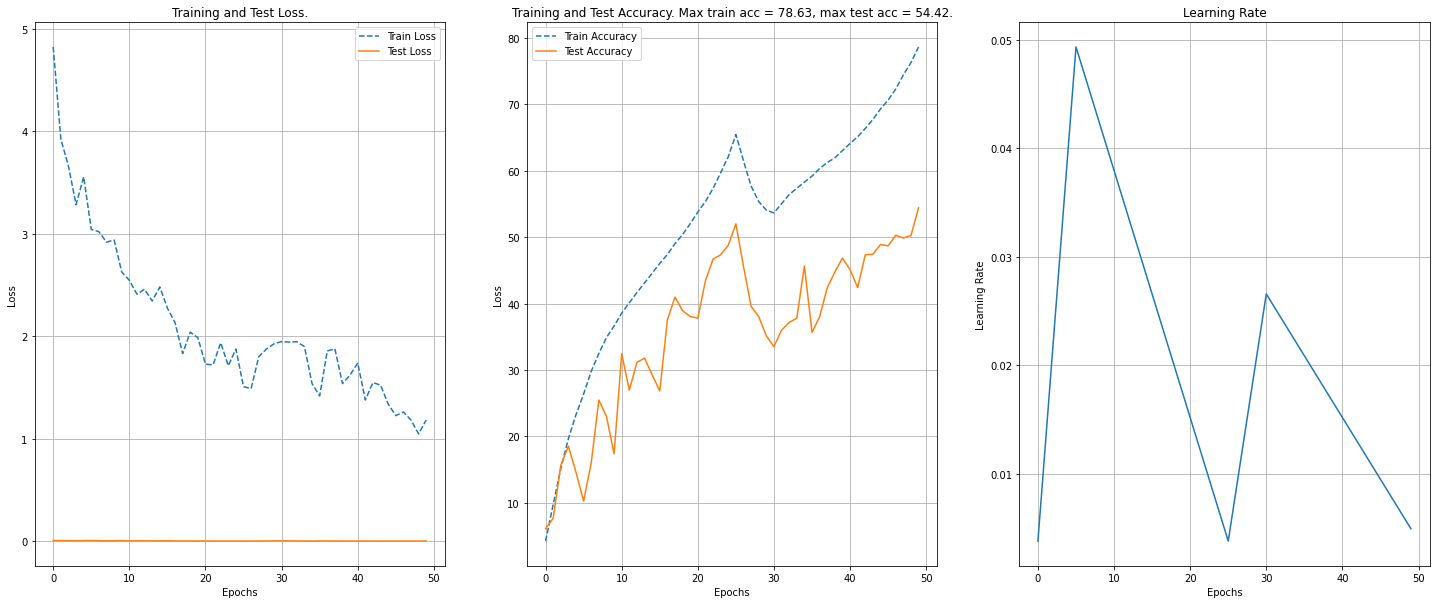

In [16]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
plotdata.PlotData.plottesttraingraph(train_losses=train_losses,train_acc=train_acc,test_losses=test_losses,
                                     test_acc=test_acc,lr_data=lr_data, plotonsamegraph=True,epochs=epochs,doProcessArray=False)

# plotdata.PlotData.plotlrrangetestgraph(lr_data,test_acc,train_acc,test_losses,train_losses)

In [0]:
from src.imports import *

%load_ext tensorboard

In [18]:
print(torch.cuda.is_available())
saved_data, epoch, model_state_dict, optimizer_state_dict, train_losses, train_acc, test_losses, test_acc\
            , test_losses, lr_data, class_correct, class_total\
= utils.Utils.loadmodel(path="savedmodels/finalmodelwithdata.pt")

True


In [19]:
model, device = utils.Utils.createmodelresnet18(model_state_dict=model_state_dict, numclasses=200)

cuda


In [20]:
batch_size = 512
helper = TinyImagenetHelper()

path = helper.download_dataset(folder_path="data")
classes, id_dict = helper.get_classes(path)

test_loader, train_loader = helper.get_tiny_image_net_test_train_loader(id_dict, path, batch_size)

data_iterator = iter(train_loader)
# plotdata.PlotData.showImagesfromdataset(data_iterator, values=classes, image_count=20, col=5)

100%|██████████| 200/200 [00:00<00:00, 2476.58it/s]
10000it [00:00, 689988.81it/s]

File: tiny-imagenet-200.zip already downloaded.
File: tiny-imagenet-200 already extracted.
Starting data loading
Finished data loading, in 0.10710716247558594 seconds
CUDA Available? True
512


In [22]:
classified, misclassified = train.TrainModel.getinferredimagesfromdataset(dataiterator=data_iterator, model=model,
                                                                          classes=classes, batch_size=batch_size,
                                                                          number=5)

<class 'KeyError'>


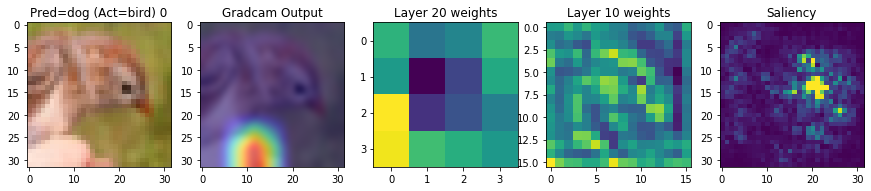

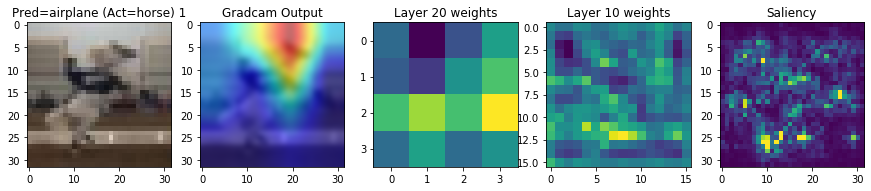

In [0]:
plotdata.PlotData.plotinferredimagesfromdataset(misclassified, model, device, classes,"misclassifed"
                                                ,size=(15,20),layerNo=34)

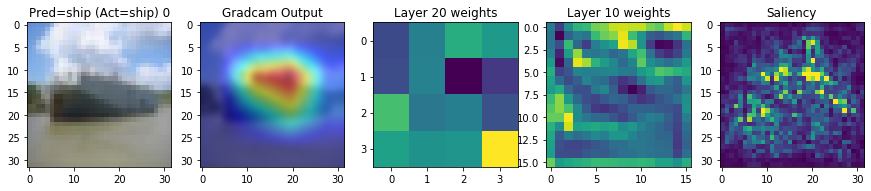

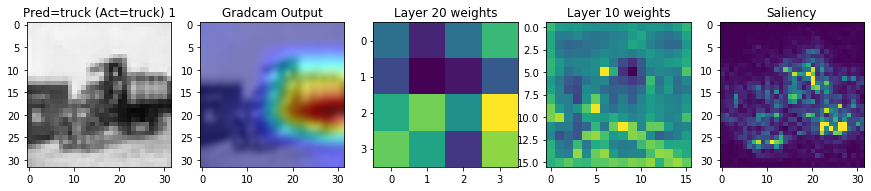

In [0]:
plotdata.PlotData.plotinferredimagesfromdataset(classified, model, device, classes,"correct"
                                                ,size=(15,20),layerNo=34)

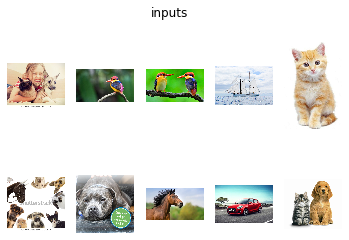

In [0]:
# from src.utils.modelutils import subplot
image_paths = glob.glob('./images/testimages/*.*')
images = list(map(lambda x: Image.open(x), image_paths))
subplot(images, title='inputs', nrows=2, ncols=5)

In [0]:
inputs = [torchvision.transforms.Compose([torchvision.transforms.Resize((32, 32)), torchvision.transforms.ToTensor(),
                                          torchvision.transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])(
    x).unsqueeze(0) for x in images]  # add 1 dim for batch
inputs = [i.to(device) for i in inputs]

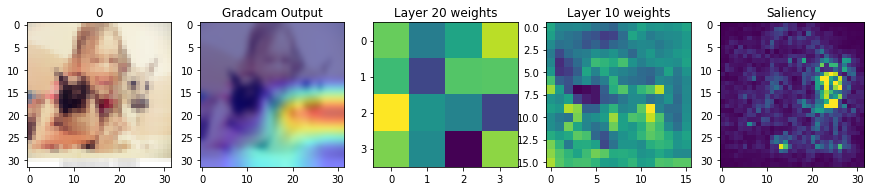

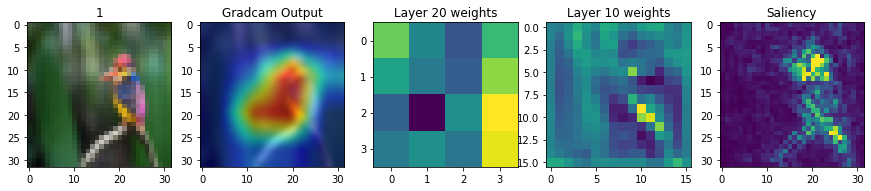

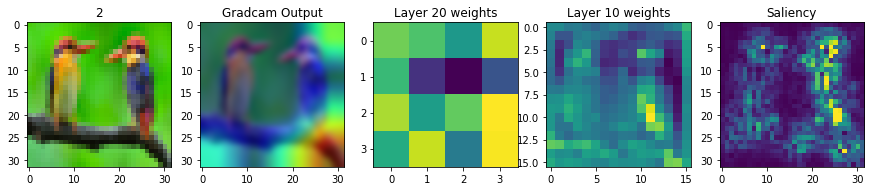

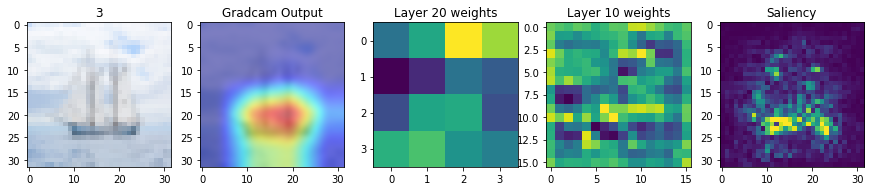

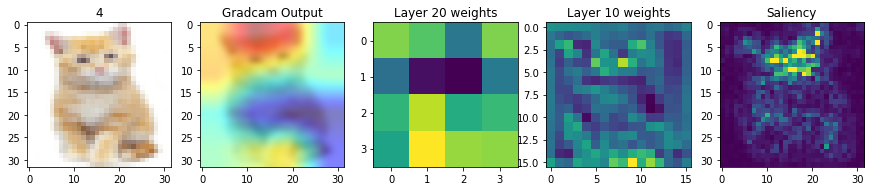

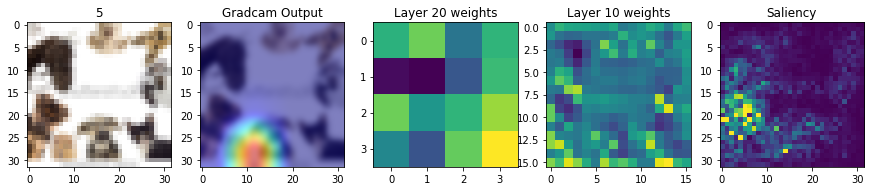

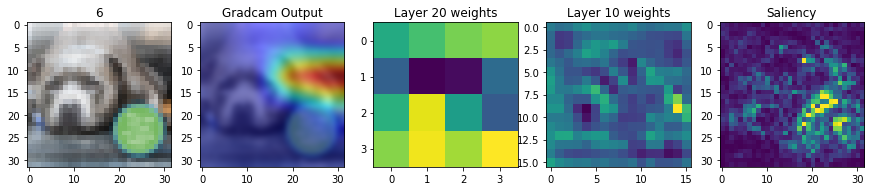

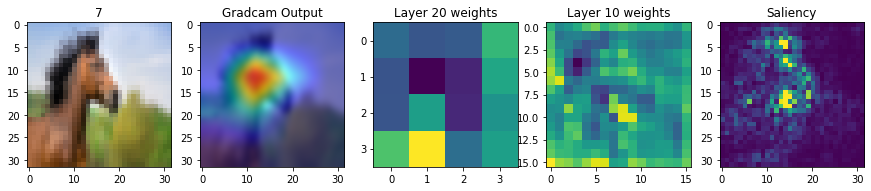

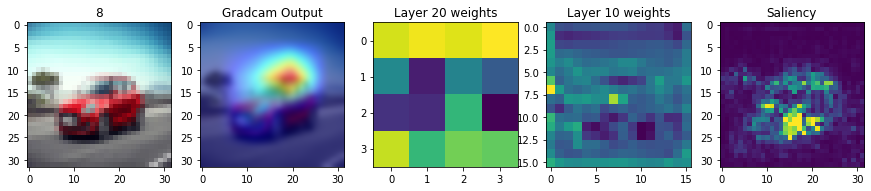

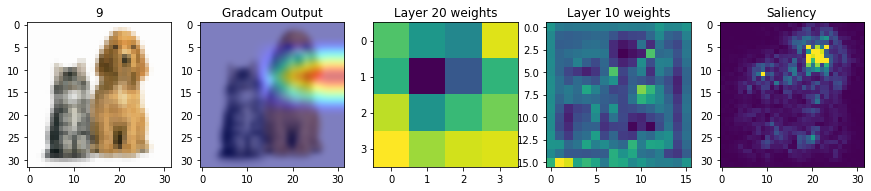

In [0]:
from src.visualization.gradcam.gradcam import GradCam
from src.visualization.gradcam import gradcamhelper

# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']


# print("Gradcam of external images for Layer 34, Conv2d, Output Shape = 8")
loc = 0
for input in inputs:  
    dict = {loc:input}
    plotdata.PlotData.plotinferredimagesfromdataset(dict, model, device, classes,"external"
                                                ,size=(15,20),layerNo=20)
    loc += 1


In [0]:
images, labels = next(iter(train_loader))

In [0]:
# model, device = utils.Utils.createmodelresnet18(model_state_dict=model_state_dict)
images, labels = images.to(device), labels.to(device)
grid = torchvision.utils.make_grid(images)

In [0]:
epochs = epoch

In [0]:
writer = SummaryWriter("customresnet_onecycle_A11")
writer.add_image('images', grid, 0)
writer.add_graph(model, images)

In [0]:
print(epochs)
for epoch in range(0, epochs):
    writer.add_scalars('Loss', {'Train': train_losses[epoch],'Test': test_losses[epoch],}, epoch+1)
    writer.add_scalars('Accuracy', {'Train': train_acc[epoch],'Test': test_acc[epoch],}, epoch+1)
    writer.add_scalar('LR', lr_data[epoch], epoch+1)
    writer.add_histogram('Test Accuracy distribution', test_acc[epoch], epoch+1)
    writer.add_histogram('Test Loss distribution', test_losses[epoch], epoch+1)
    writer.add_histogram('Train Accuracy distribution', train_acc[epoch], epoch+1)
    writer.add_histogram('Train Loss distribution', train_losses[epoch], epoch+1)
    
writer.close()

24


In [0]:
tensorboard --logdir=customresnet_onecycle_A11

In [0]:
torch.cuda.empty_cache()

test_dataset = None
train_dataset = None
test_loader = None
train_loader = None

import gc
gc.collect()

74

In [0]:
!kill 27460

/bin/sh: 1: kill: No such process



In [0]:
torch.cuda.empty_cache()